In [1]:
import pandas as pd

data = pd.read_csv(r'C:\Users\AbdelqaderAlmanaseer\Desktop\Fraud Analysis\fraud.csv')

data = data.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

print(data.dtypes)

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


In [2]:
data.replace('U', pd.NA, inplace=True)

data['age'] = pd.to_numeric(data['age'], errors='coerce')

age_mean = round(data['age'].mean())

data['age'] = data['age'].fillna(age_mean).astype(int)

print(data.dtypes)

step             int64
customer        object
age              int32
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


In [3]:
data['gender'] = data['gender'].astype('category')
data['category'] = data['category'].astype('category')

age_category_map = {
    0: '<= 18',
    1: '19-25',
    2: '26-35',
    3: '36-45',
    4: '46-55',
    5: '56-65',
    6: '> 65'
}

data['age_category'] = data['age'].map(age_category_map)

print(data.dtypes)
print(data.head())
print(data.corr())

step               int64
customer          object
age                int32
gender          category
zipcodeOri        object
merchant          object
zipMerchant       object
category        category
amount           float64
fraud              int64
age_category      object
dtype: object
   step     customer  age gender zipcodeOri     merchant zipMerchant  \
0     0  C1093826151    4      M      28007   M348934600       28007   
1     0   C352968107    2      M      28007   M348934600       28007   
2     0  C2054744914    4      F      28007  M1823072687       28007   
3     0  C1760612790    3      M      28007   M348934600       28007   
4     0   C757503768    5      M      28007   M348934600       28007   

            category  amount  fraud age_category  
0  es_transportation    4.55      0        46-55  
1  es_transportation   39.68      0        26-35  
2  es_transportation   26.89      0        46-55  
3  es_transportation   17.25      0        36-45  
4  es_transportation   

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data[['gender']] = imputer.fit_transform(data[['gender']])

encoded_data = pd.get_dummies(data, columns=['age_category', 'gender','category'])

X = encoded_data.drop(columns=['fraud', 'customer', 'merchant'])
y = encoded_data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(encoded_data.head())

   step     customer  age zipcodeOri     merchant zipMerchant  amount  fraud  \
0     0  C1093826151    4      28007   M348934600       28007    4.55      0   
1     0   C352968107    2      28007   M348934600       28007   39.68      0   
2     0  C2054744914    4      28007  M1823072687       28007   26.89      0   
3     0  C1760612790    3      28007   M348934600       28007   17.25      0   
4     0   C757503768    5      28007   M348934600       28007   35.72      0   

   age_category_19-25  age_category_26-35  ...  category_es_home  \
0                   0                   0  ...                 0   
1                   0                   1  ...                 0   
2                   0                   0  ...                 0   
3                   0                   0  ...                 0   
4                   0                   0  ...                 0   

   category_es_hotelservices  category_es_hyper  category_es_leisure  \
0                          0          

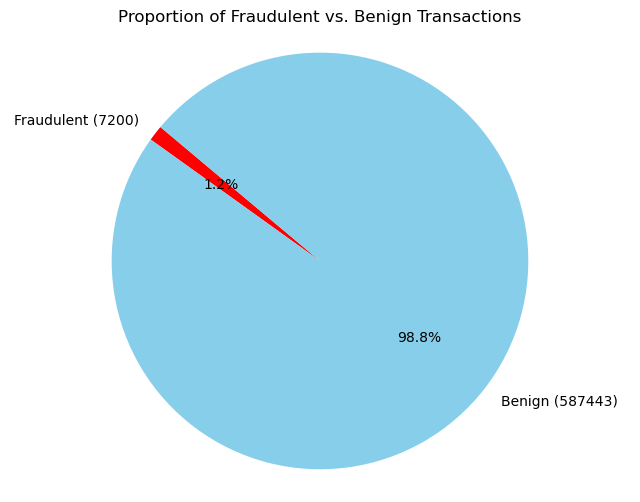

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_counts = data['fraud'].value_counts()
total_transactions = fraud_counts.sum()
fraudulent_transactions = fraud_counts[1]

fraudulent_percentage = (fraudulent_transactions / total_transactions) * 100
benign_percentage = 100 - fraudulent_percentage

labels = ['Fraudulent ({})'.format(fraudulent_transactions), 'Benign ({})'.format(fraud_counts[0])]
sizes = [fraudulent_percentage, benign_percentage]

colors = ['red', 'skyblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Fraudulent vs. Benign Transactions')
plt.axis('equal')
plt.show()

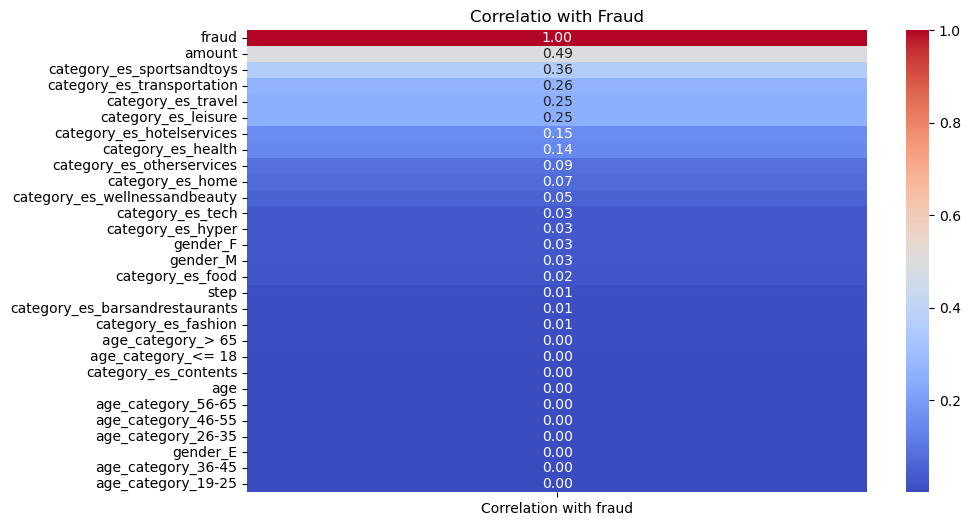

In [6]:
fraud_correlation = encoded_data.corrwith(data['fraud'])
correlation_df = pd.DataFrame({'Correlation with fraud': fraud_correlation})
correlation_df_sorted = correlation_df.abs().sort_values(by='Correlation with fraud', ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df_sorted, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlatio with Fraud')
plt.show()

C:\Users\AbdelqaderAlmanaseer\AppData\Local\Temp\ipykernel_3852\987313172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['category'] = fraud_data['category'].str.replace('es_', '', regex=False)


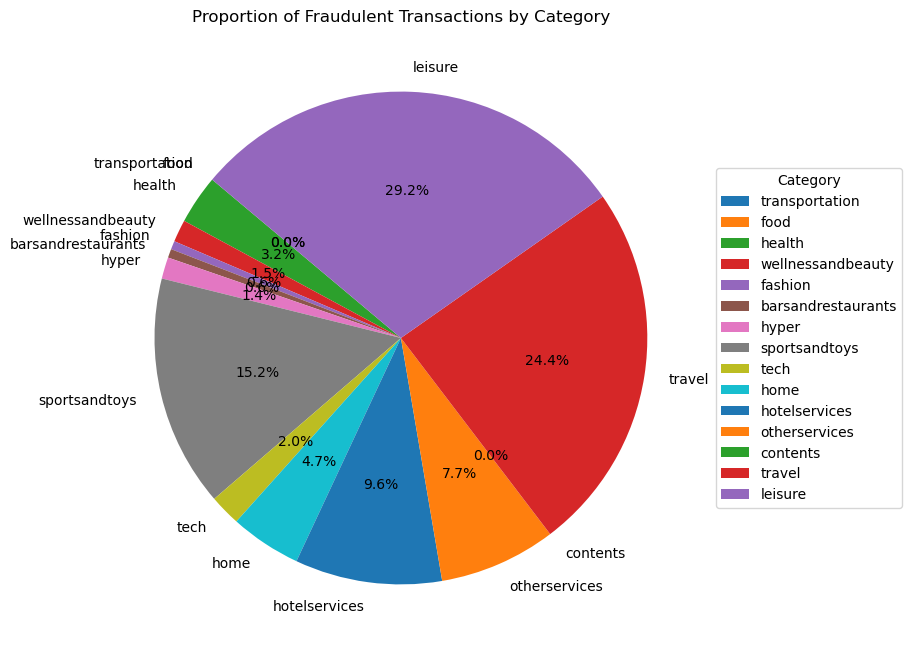

In [17]:
fraud_data = data[data['fraud'] == 1]

data['category'] = data['category'].str.replace('es_', '', regex=False)
fraud_data['category'] = fraud_data['category'].str.replace('es_', '', regex=False)

fraud_counts = fraud_data['category'].value_counts()

total_counts = data['category'].value_counts()

fraud_counts = fraud_counts.reindex(total_counts.index, fill_value=0)

proportions = fraud_counts / total_counts

fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autopct_texts = ax.pie(
    proportions,
    labels=proportions.index,
    autopct='%1.1f%%',
    startangle=140
)

ax.set_title('Proportion of Fraudulent Transactions by Category')

ax.legend(wedges, proportions.index, title='Category', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

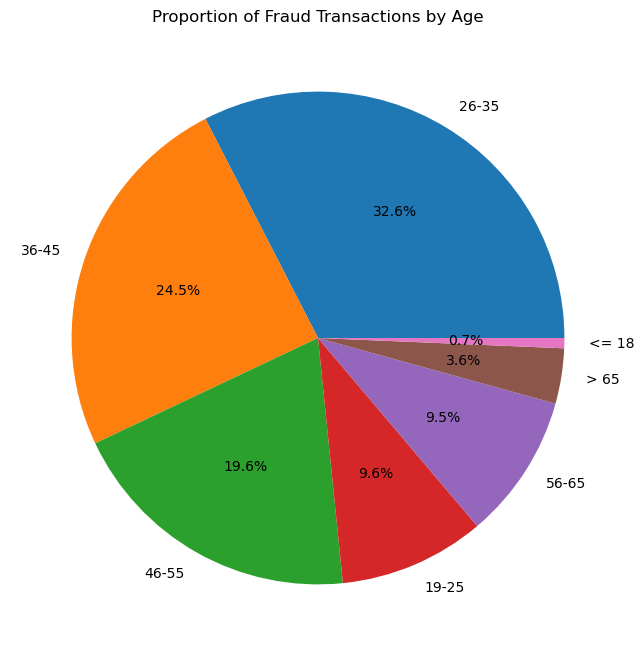

In [8]:
fraud_age_counts = fraud_data['age_category'].value_counts()

plt.figure(figsize=(8, 8))
fraud_age_counts.plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Fraud Transactions by Age')
plt.ylabel('')
plt.show()

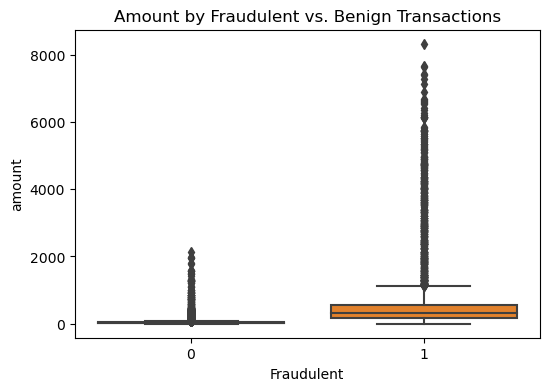

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='amount', x='fraud')
plt.title('Amount by Fraudulent vs. Benign Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('amount')
plt.show()

In [11]:
data['hour_of_day'] = data['step']

from sklearn.preprocessing import MinMaxScaler

numerical_features = ['amount', 'hour_of_day']

scaler = MinMaxScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

   step     customer  age gender zipcodeOri     merchant zipMerchant  \
0     0  C1093826151    4      M      28007   M348934600       28007   
1     0   C352968107    2      M      28007   M348934600       28007   
2     0  C2054744914    4      F      28007  M1823072687       28007   
3     0  C1760612790    3      M      28007   M348934600       28007   
4     0   C757503768    5      M      28007   M348934600       28007   

         category    amount  fraud age_category  hour_of_day  
0  transportation  0.000546      0        46-55          0.0  
1  transportation  0.004764      0        26-35          0.0  
2  transportation  0.003228      0        46-55          0.0  
3  transportation  0.002071      0        36-45          0.0  
4  transportation  0.004288      0        56-65          0.0  


In [12]:
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier()
}

evaluation_metric = make_scorer(f1_score)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=evaluation_metric)
    results[name] = scores.mean()

for name, score in results.items():
    print(f"{name}: F1-score = {score:.4f}")

C:\Users\AbdelqaderAlmanaseer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: F1-score = 0.7309
Gradient Boosting: F1-score = 0.7394
Logistic Regression: F1-score = 0.6837
Neural Network: F1-score = 0.6877


In [13]:
test_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_score = f1_score(y_test, y_pred)
    test_scores[name] = test_score

best_model = max(test_scores, key=test_scores.get)
best_score = test_scores[best_model]

for name, score in test_scores.items():
    print(f"{name}: F1-score = {score:.4f}")

print(f"\nBest performing model: {best_model} with F1-score = {best_score:.4f}")

Random Forest: F1-score = 0.7494
Gradient Boosting: F1-score = 0.7547
Logistic Regression: F1-score = 0.7043
Neural Network: F1-score = 0.7264

Best performing model: Gradient Boosting with F1-score = 0.7547


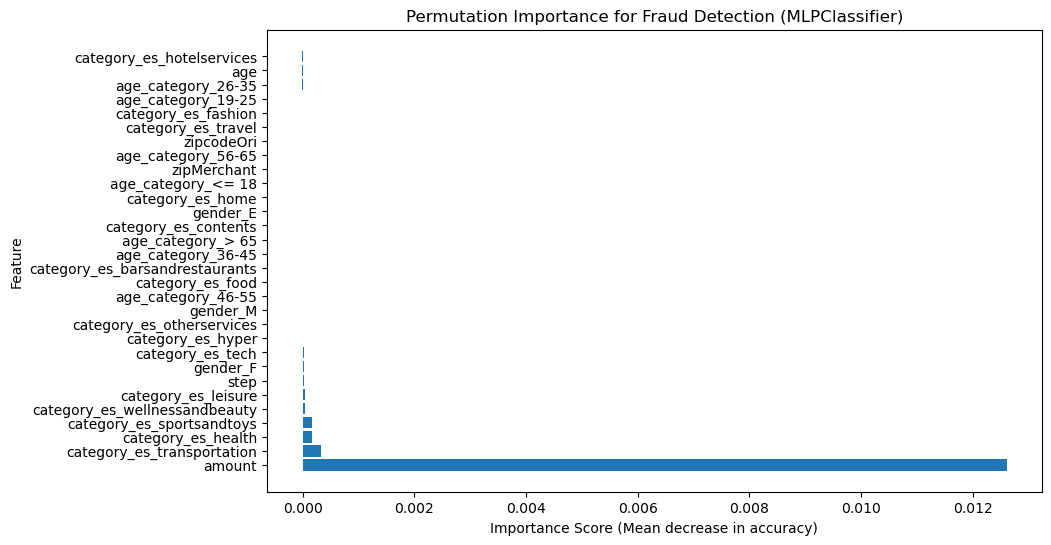

Key Features Influencing Fraud Detection:
amount
category_es_transportation
category_es_health
category_es_sportsandtoys
category_es_wellnessandbeauty
category_es_leisure
step
gender_F
category_es_tech
category_es_hyper


In [14]:
from sklearn.inspection import permutation_importance

model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

feature_importance = perm_importance.importances_mean

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score (Mean decrease in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation Importance for Fraud Detection (MLPClassifier)')
plt.show()

n_top_features = 10
key_features = feature_importance_df.head(n_top_features)['Feature'].tolist()
print("Key Features Influencing Fraud Detection:")
for feature in key_features:
    print(feature)

In [12]:
from imblearn.over_sampling import SMOTE

random_seed = 5

data_sampled = data.sample(n=50000, random_state=random_seed)

data_sampled['age_category'] = data_sampled['age'].map(age_category_map)

data_sampled[['gender']] = imputer.fit_transform(data_sampled[['gender']])

encoded_data_sampled = pd.get_dummies(data_sampled, columns=['age_category', 'gender', 'category'])

X_sampled = encoded_data_sampled.drop(columns=['fraud', 'customer', 'merchant'])
y_sampled = encoded_data_sampled['fraud']

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=random_seed)

smote = SMOTE(random_state=random_seed)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

results_sampled = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring=evaluation_metric)
    results_sampled[name] = scores.mean()

for name, score in results_sampled.items():
    print(f"{name}: F1-score = {score:.4f}")

test_scores_sampled = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_sampled)
    test_score = f1_score(y_test_sampled, y_pred)
    test_scores_sampled[name] = test_score

best_model_sampled = max(test_scores_sampled, key=test_scores_sampled.get)
best_score_sampled = test_scores_sampled[best_model_sampled]

print(f"\nBest performing model after SMOTE with sampled data: {best_model_sampled} with F1-score = {best_score_sampled:.4f}")

C:\Users\AbdelqaderAlmanaseer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbdelqaderAlmanaseer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Random Forest: F1-score = 0.9961
Gradient Boosting: F1-score = 0.9912
Logistic Regression: F1-score = 0.9678
Neural Network: F1-score = 0.9560

Best performing model after SMOTE with sampled data: Random Forest with F1-score = 0.6839


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=random_seed)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters for Random Forest:")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

y_pred = best_rf_model.predict(X_test_sampled)
best_f1_score = f1_score(y_test_sampled, y_pred)

print(f"\nF1-score of the optimized Random Forest model: {best_f1_score:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters for Random Forest:
max_depth: 20
max_features: log2
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 50

F1-score of the optimized Random Forest model: 0.6633


In [15]:
from imblearn.over_sampling import SMOTE

random_seed = 5

data_sampled = data.sample(n=50000, random_state=random_seed)

data_sampled['age_category'] = data_sampled['age'].map(age_category_map)

data_sampled[['gender']] = imputer.fit_transform(data_sampled[['gender']])

encoded_data_sampled = pd.get_dummies(data_sampled, columns=['age_category', 'gender', 'category'])

X_sampled = encoded_data_sampled.drop(columns=['fraud', 'customer', 'merchant'])
y_sampled = encoded_data_sampled['fraud']

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=random_seed)

smote = SMOTE(random_state=random_seed)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

results_sampled = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring=evaluation_metric)
    results_sampled[name] = scores.mean()

for name, score in results_sampled.items():
    print(f"{name}: F1-score = {score:.4f}")

test_scores_sampled = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_sampled)
    test_score = f1_score(y_test_sampled, y_pred)
    test_scores_sampled[name] = test_score

best_model_sampled = max(test_scores_sampled, key=test_scores_sampled.get)
best_score_sampled = test_scores_sampled[best_model_sampled]

print(f"\nBest performing model after SMOTE with sampled data: {best_model_sampled} with F1-score = {best_score_sampled:.4f}")

C:\Users\AbdelqaderAlmanaseer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbdelqaderAlmanaseer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Random Forest: F1-score = 0.9960
Gradient Boosting: F1-score = 0.9876
Logistic Regression: F1-score = 0.8691
Neural Network: F1-score = 0.7531

Best performing model after SMOTE with sampled data: Random Forest with F1-score = 0.6852


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=random_seed)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters for Random Forest:")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

y_pred = best_rf_model.predict(X_test_sampled)
best_f1_score = f1_score(y_test_sampled, y_pred)

print(f"\nF1-score of the optimized Random Forest model: {best_f1_score:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters for Random Forest:
max_depth: None
max_features: auto
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 50

F1-score of the optimized Random Forest model: 0.6968
